In [13]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris
iris= load_iris()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [23]:
df_clf= DecisionTreeClassifier() 
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
#Decisiontree 시각화하기
from sklearn.tree import export_graphviz

export_graphviz(df_clf, out_file="tree_test2.dot", class_names = iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

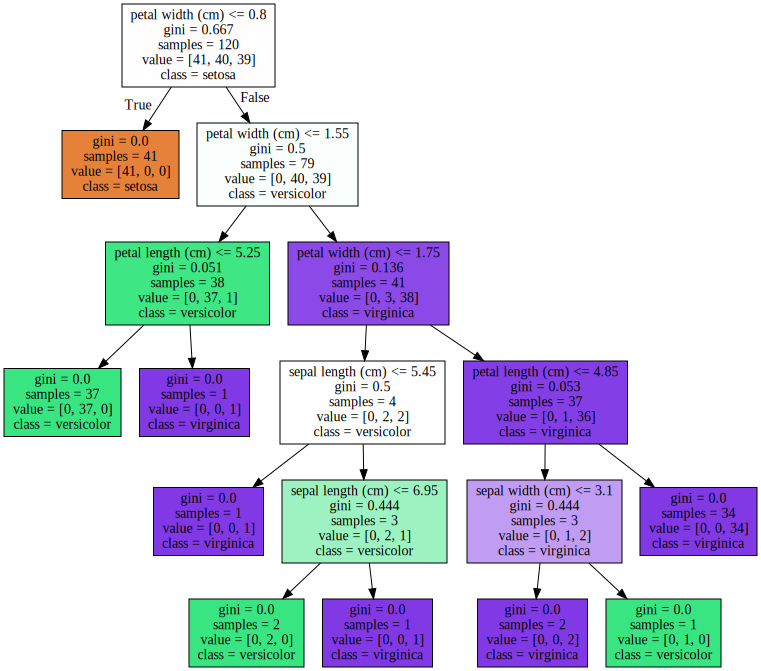

In [30]:
import graphviz
with open("tree_test2.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importances : 
[0.025 0.017 0.032 0.926]
sepal length (cm) : 0.025
sepal width (cm) : 0.017
petal length (cm) : 0.032
petal width (cm) : 0.926


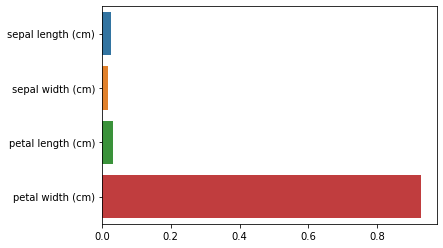

In [31]:
import seaborn as sns

#feature importance 추출
print("Feature importances : \n{0}".format(np.round(df_clf.feature_importances_,3)))

#feature 별 importance 매핑
for name, value in zip(iris.feature_names, df_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=df_clf.feature_importances_, y=iris.feature_names)

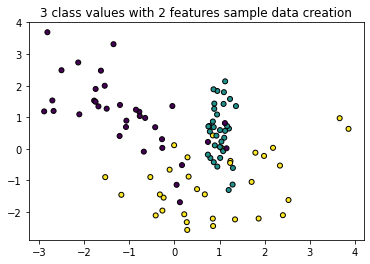

In [27]:
#결정트리 과적합을 시각화해서 살펴보기

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 class values with 2 features sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant = 0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색
plt.scatter(X_features[:,0], X_features[:,1], marker='o',c=y_labels, s=25, edgecolor='k')

In [28]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


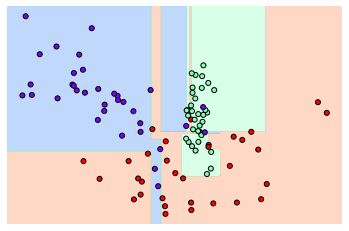

In [9]:
dt_clf = DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

이상치 데이터까지 분류하기 위해서 분할이 자주 일어나 결정 기준경계가 많아진 모습

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'clim'


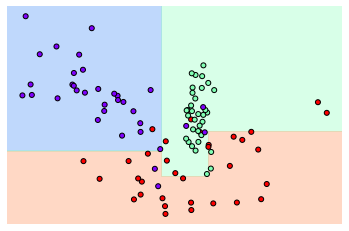

In [10]:
#min_samples_leaf=6으로 트리생성 조건을 제약함
dt_clf2=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf2,X_features,y_labels)

위의 그래프보다 이상치에 크게 반응하지 않으면서 좀더 일반화된 분류 규칙에 따라 분류되었다.

In [11]:
#DecisionTree 실습해보기

In [36]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
bc

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [41]:
bc_data= pd.DataFrame(bc['data'],columns=bc['feature_names'])
bc_data['target'] = bc['target']
bc_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [58]:
X=bc_data.loc[:,'mean radius':'worst fractal dimension']
Y=bc_data.loc[:,'target']

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수를 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
0,63306.172036,mean radius
2,58123.586079,mean perimeter
20,9674.742602,worst radius
22,4487.781270,worst perimeter
3,1287.262339,mean area
23,1138.759252,worst area
9,629.679874,mean fractal dimension
29,423.396723,worst fractal dimension
4,393.398166,mean smoothness
24,375.597155,worst smoothness


In [60]:
#다중공선성 문제 해결하기 위해 VIF 큰 것들 삭제
X=X.drop(['mean radius','mean perimeter','worst radius','worst perimeter'], axis=1)

In [61]:
#다시한번 VIF 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
7,508.086825,mean fractal dimension
25,407.966361,worst fractal dimension
2,372.138153,mean smoothness
20,368.115456,worst smoothness
18,332.075419,worst texture
0,246.043226,mean texture
24,208.954040,worst symmetry
6,176.589221,mean symmetry
5,149.996245,mean concave points
4,144.915418,mean concavity


In [64]:
from sklearn.model_selection import train_test_split

# 유방암 데이터 학습 데이터와 테스트 데이터 분할
X_tr,X_te,Y_tr,Y_te = train_test_split(X,Y, test_size=0.2, random_state=11)

In [65]:
#제약없는 decision tree 적용
dt_clf3 = DecisionTreeClassifier()
dt_clf3.fit(X_tr,Y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
X.columns
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

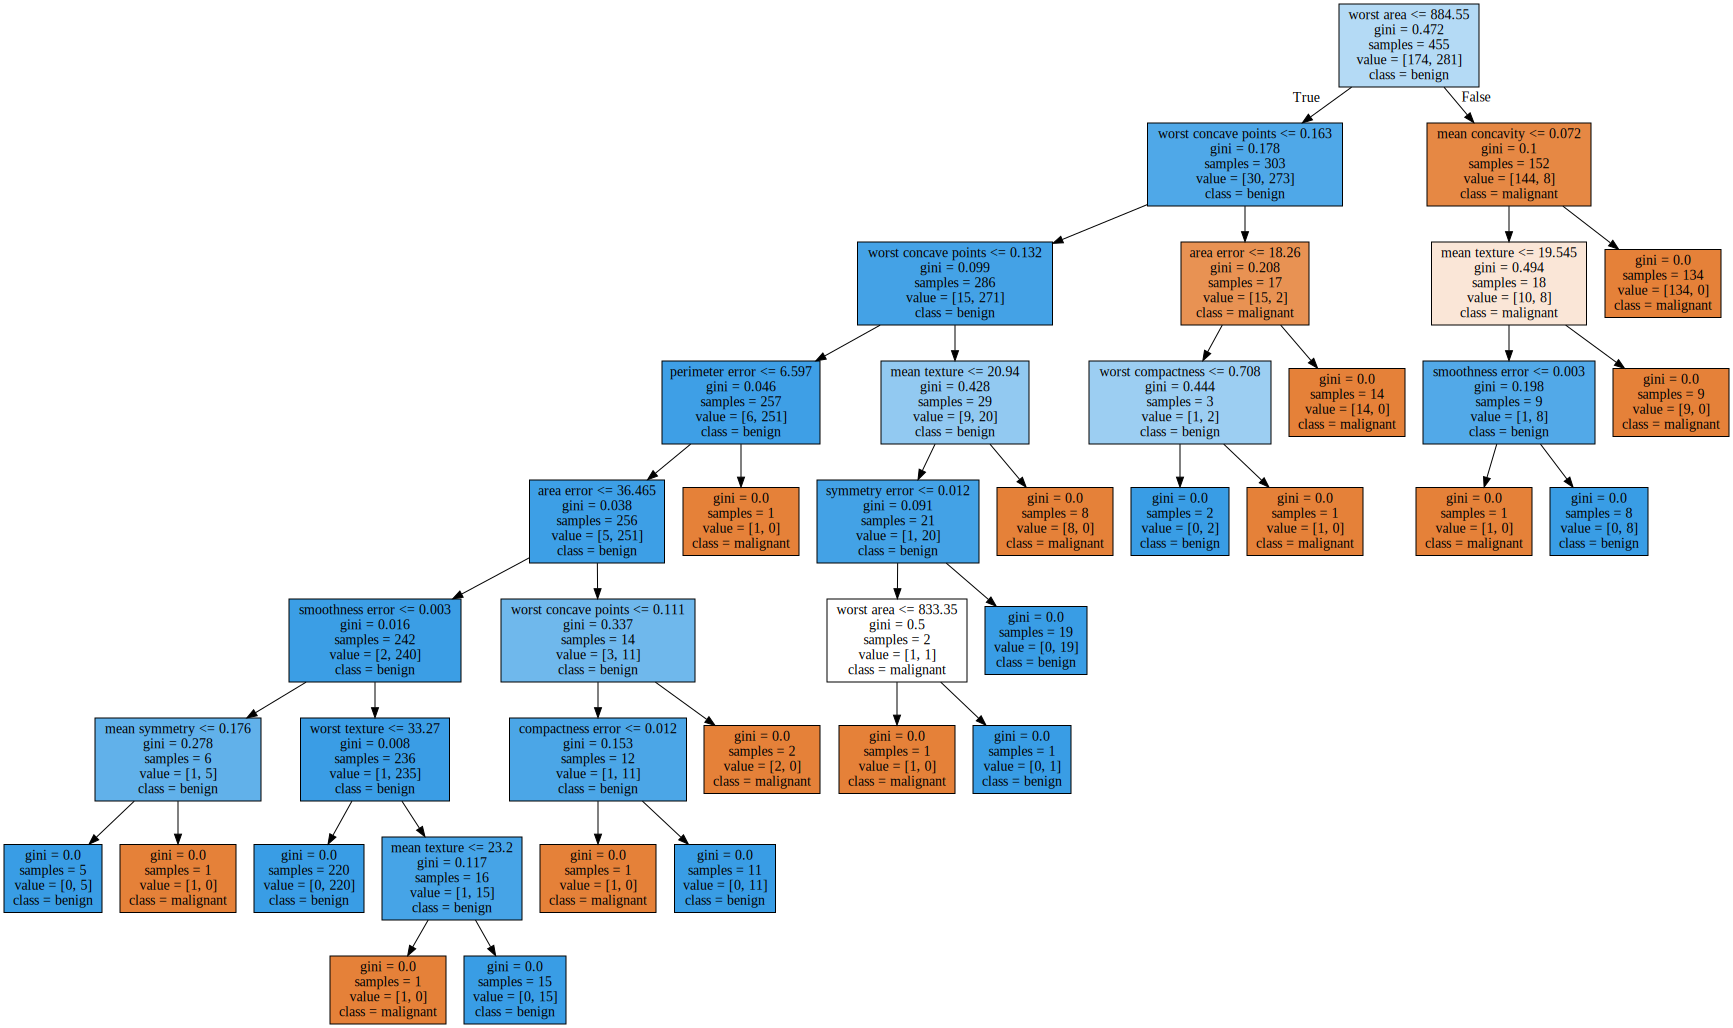

In [105]:
#시각화해보기
export_graphviz(dt_clf3, out_file="tree_test3.dot", class_names =bc.target_names, feature_names=X.columns, impurity=True, filled=True)

with open("tree_test3.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [107]:
# 아무런 제약을 주지않은 decisiontree의 정확도
from sklearn.metrics import accuracy_score

pred = dt_clf3.predict(X_te)
accuracy = accuracy_score(Y_te , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.9737


In [114]:
# 제약을 줘보자
dt_clf4=DecisionTreeClassifier(max_depth=5)
dt_clf4.fit(X_tr,Y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
pred2 = dt_clf4.predict(X_te)
accuracy2 = accuracy_score(Y_te , pred2)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy2))

결정 트리 예측 정확도: 0.9737


Feature importances : 
[3.2049e-01 1.3350e-02 1.4055e-01 0.0000e+00 5.6650e-02 0.0000e+00
 0.0000e+00 9.0900e-03 0.0000e+00 0.0000e+00 1.4820e-02 0.0000e+00
 4.6700e-03 3.3950e-02 0.0000e+00 2.0000e-04 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.9270e-01 4.7790e-02 0.0000e+00
 7.0100e-03 4.0500e-03 1.3788e-01 2.2500e-03 1.4540e-02 0.0000e+00]
mean radius : 0.320
mean texture : 0.013
mean perimeter : 0.141
mean area : 0.000
mean smoothness : 0.057
mean compactness : 0.000
mean concavity : 0.000
mean concave points : 0.009
mean symmetry : 0.000
mean fractal dimension : 0.000
radius error : 0.015
texture error : 0.000
perimeter error : 0.005
area error : 0.034
smoothness error : 0.000
compactness error : 0.000
concavity error : 0.000
concave points error : 0.000
symmetry error : 0.000
fractal dimension error : 0.000
worst radius : 0.000
worst texture : 0.193
worst perimeter : 0.048
worst area : 0.000
worst smoothness : 0.007
worst compactness : 0.004
worst concavity : 0.138


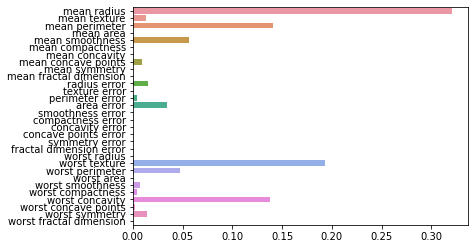

In [121]:
#feature importance 나타내보기
import seaborn as sns
dt_clf5=DecisionTreeClassifier(max_features=3)

# 데이터 불러오기
data = load_breast_cancer()
# 속성데이터
X = data.data
# 클래스 데이터
y = data.target
#train, test set 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dt_clf5.fit(X_train, y_train)

#feature importance 추출
print("Feature importances : \n{0}".format(np.round(dt_clf5.feature_importances_,5)))

#feature 별 importance 매핑
for name, value in zip(data.feature_names, dt_clf5.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf5.feature_importances_, y=data.feature_names)